In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

<br>
<br>
<br>

### Data collection & inspection

In [2]:
# training data
train_data = pd.read_csv("../data/train.csv")
# test data
test_data = pd.read_csv("../data/test.csv")

In [5]:
# inspecting training data
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# inspecting test data
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
# training data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [33]:
# test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [41]:
# checking if features have same dtype
# in training and test data
train_data.dtypes.values[:-1] == test_data.dtypes.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [32]:
# missing values in training data
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [34]:
# missing values in test data
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [36]:
# shape of training data
train_data.shape

(8693, 14)

In [37]:
# shape of test data
test_data.shape

(4277, 13)

<br>
<br>
<br>

### EDA

#### Transported

Target variable

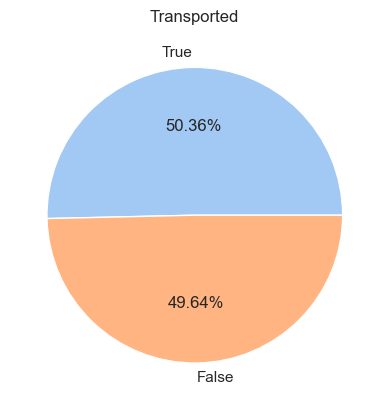

In [51]:
# value counts
transported_count = train_data.Transported.value_counts()

# creating pieplot
plt.pie(x=transported_count.values, labels=transported_count.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
plt.title("Transported")
plt.show()

note:
- transported ratio is 50.36 : 49.64
- expected to see same ratio in test set

<br>

#### Age

In [50]:
# descriptive statistics
train_data.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

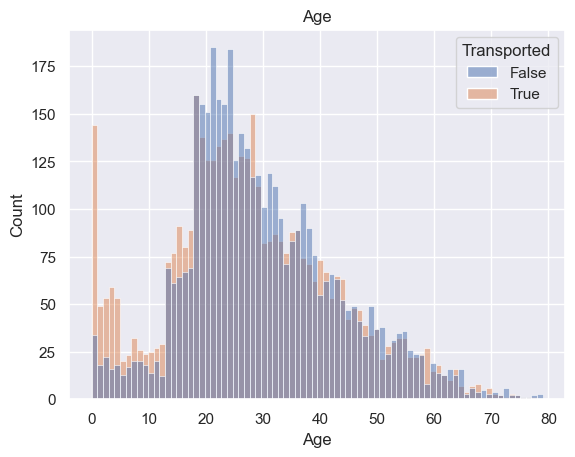

In [53]:
# plotting histogram
sns.histplot(x=train_data.Age, hue=train_data.Transported, bins=80)
plt.title("Age")
plt.show()

note:
- people below the age of 18 (children) are likely to be transported
- babies (less than an year old) have highest transported ratio
- young adults (18-40) are likely to be not transported

actions:
- create age category 0-18, 18-40, 40-80

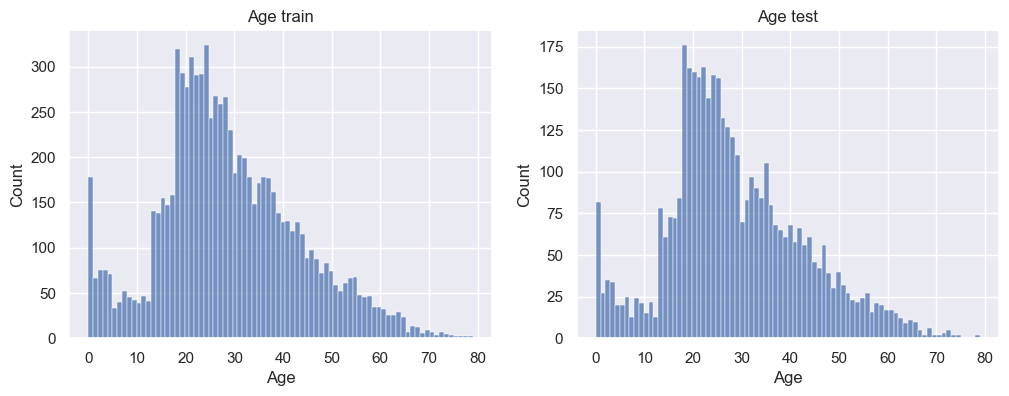

In [89]:
# histogram for training age
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(train_data.Age, bins=80)
plt.title("Age train")

# histogram for test age
plt.subplot(1, 2, 2)
sns.histplot(test_data.Age, bins=80)
plt.title("Age test")

plt.show()

note:
- age train and age test have similar distribution

<br>

#### Spendings

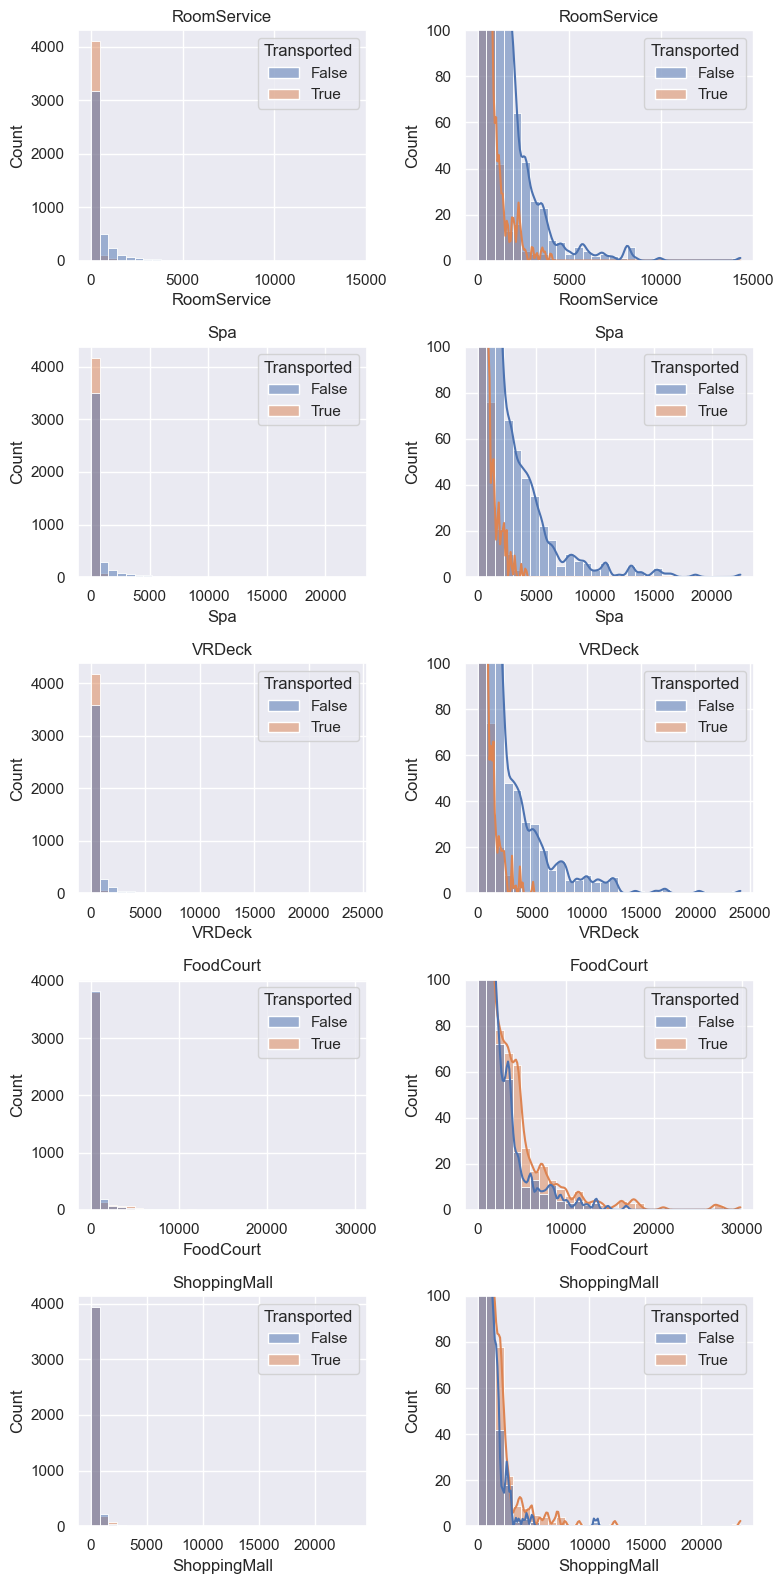

In [113]:
spending_columns = ["RoomService", "Spa", "VRDeck", "FoodCourt", "ShoppingMall"]


fig=plt.figure(figsize=(8,16))

for i, column in enumerate(spending_columns):
    # full histogram (left)
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_data, x=column, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(column)
    
    # zoomed in histogram (right)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_data, x=column, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(column)

fig.tight_layout()  # improves appearance
plt.show()

note:
- RoomService, Spa, VRDeck show similar trends
- FoodCourt, ShoppingMall show similar trends
- In first group, non-spending passengers are transported while spending passengers are not transported
- In second group, spending passengers are more likely transported
- Highly skewed distribution

actions:
- create 2 boolen features: group_one_spending (whether a passenger in group 1 spend any money) and group_two_spending (whether a passenger in group 2 spend any money)
- reduce skewness of data by taking log transformation

<br>

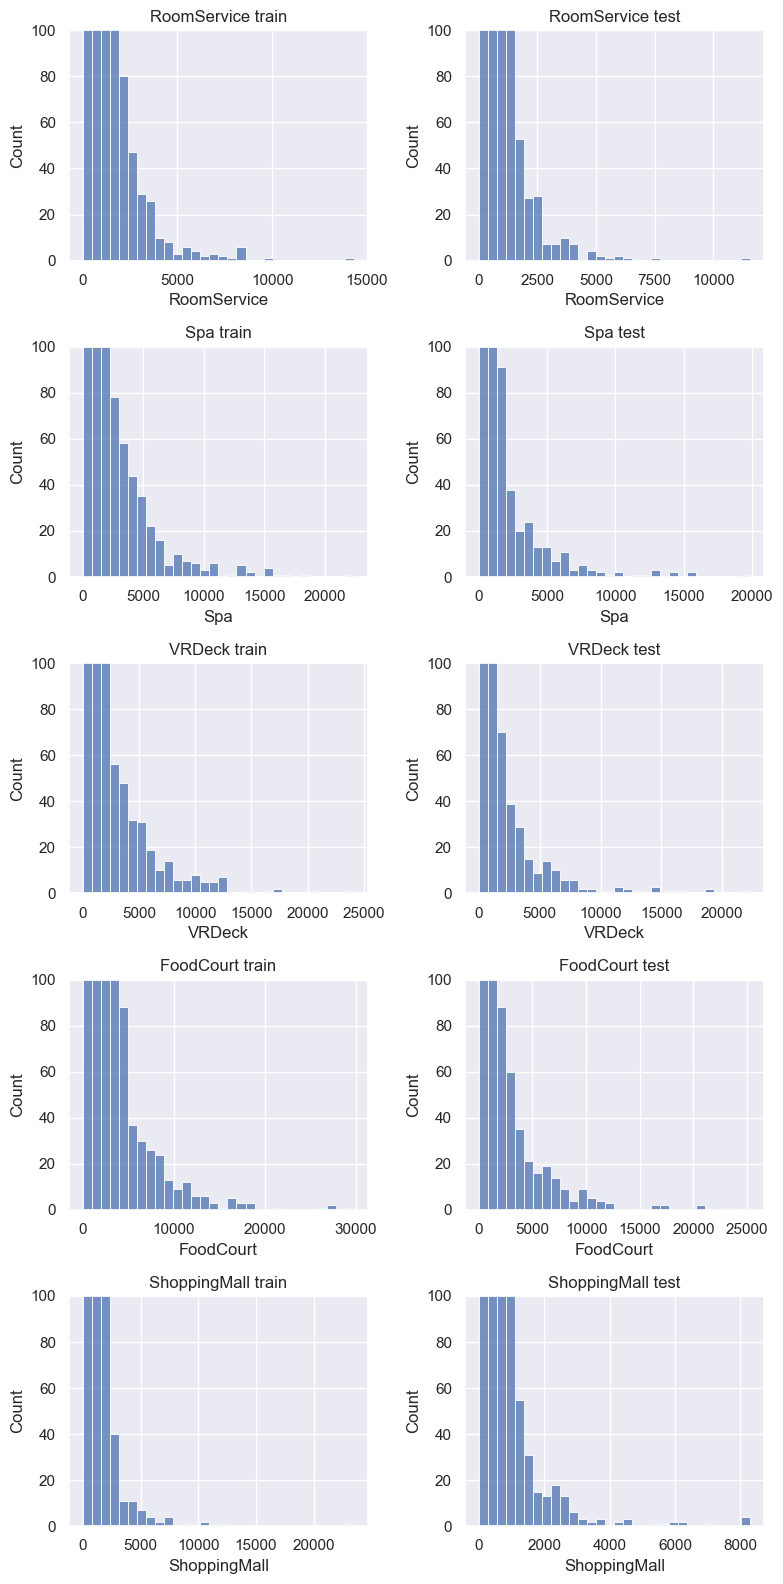

In [115]:
fig=plt.figure(figsize=(8,16))
for i, column in enumerate(spending_columns):
    # training data (left)
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_data, x=column, axes=ax, bins=30)
    plt.ylim([0,100])
    ax.set_title(f"{column} train")
    
    # test data (right)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=test_data, x=column, axes=ax, bins=30)
    plt.ylim([0,100])
    ax.set_title(f"{column} test")

fig.tight_layout()  # improves appearance
plt.show()

note:
- train and test data have similar distributions

<br>

#### Categorical features

In [117]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

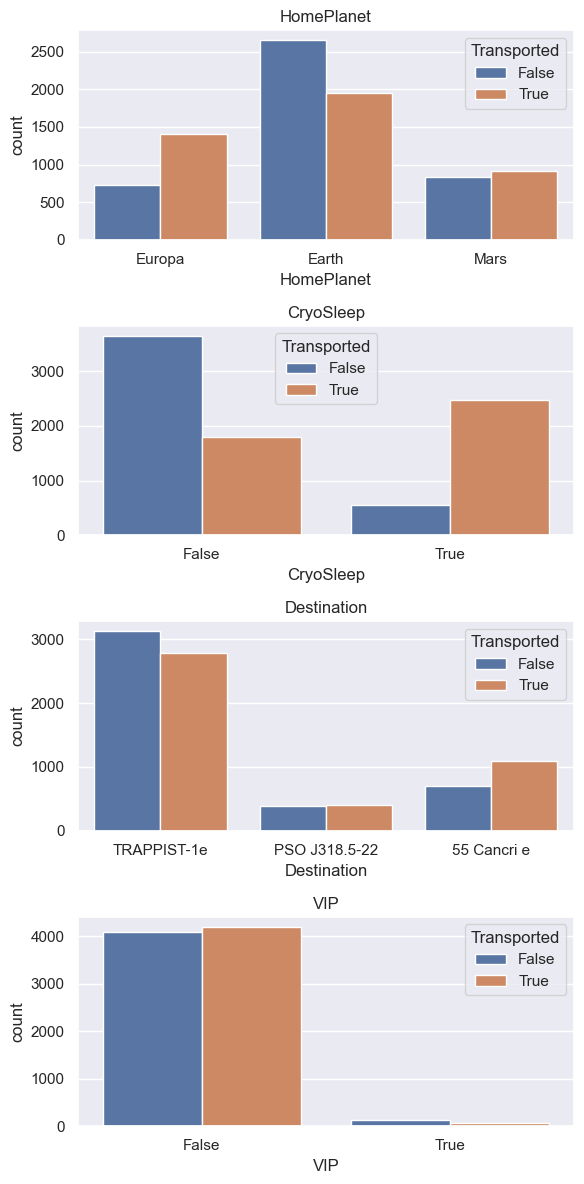

In [118]:
categorical_columns = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

fig=plt.figure(figsize=(6,12))

for i, column in enumerate(categorical_columns):
    # countplot with hue of transportation
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_data, x=column, axes=ax, hue='Transported')
    ax.set_title(column)

fig.tight_layout()  # improves appearance
plt.show()

notes:
- vip has less target deviation for its categories. Hence is less useful
- others have high deviation across various categories. Hence more useful

action:
- can drop vip feature to prevent overfitting

<br>

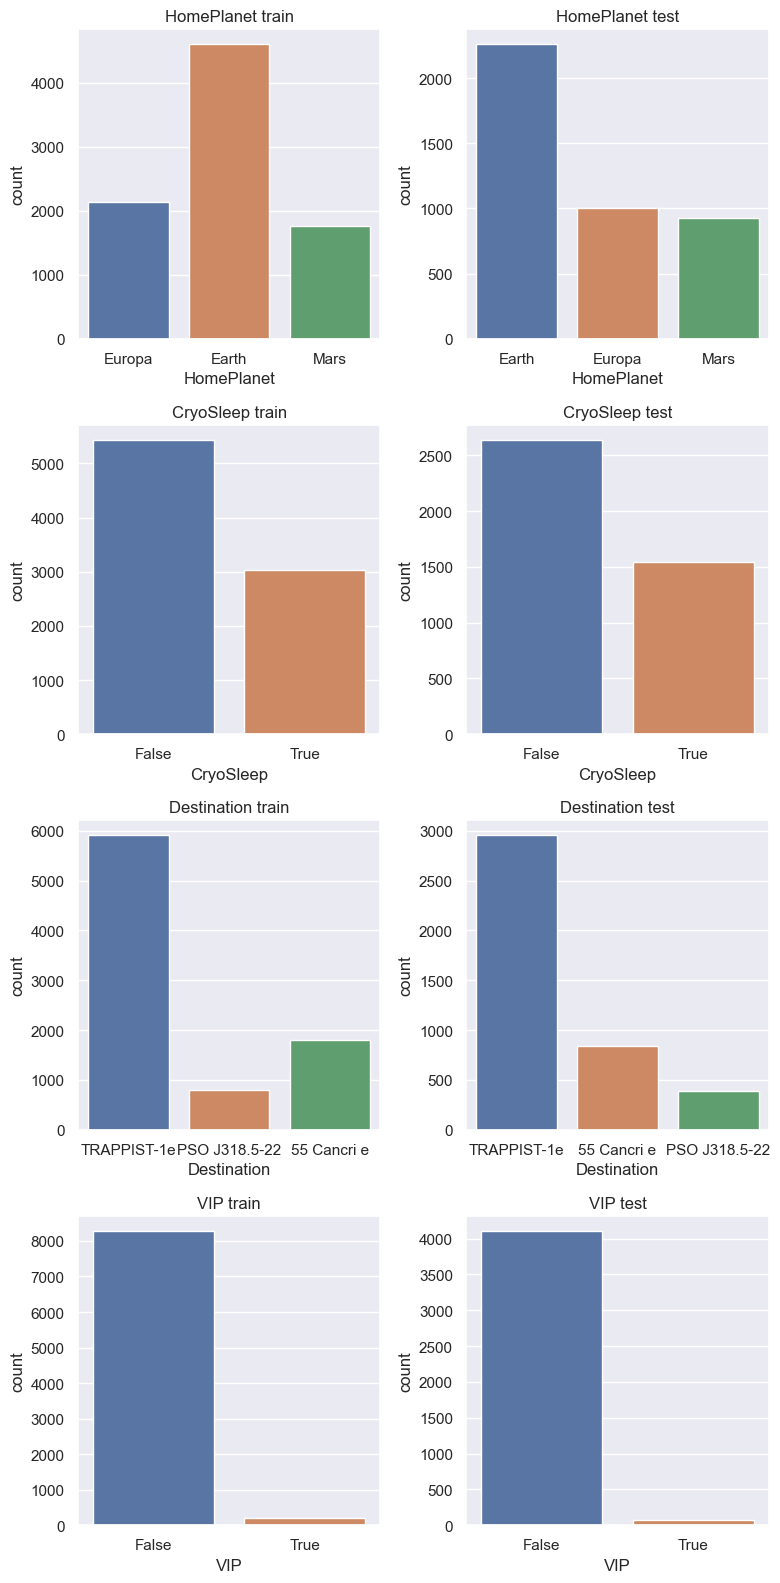

In [121]:
fig=plt.figure(figsize=(8,16))

for i, column in enumerate(categorical_columns):
    # training data (left)
    ax=fig.add_subplot(4,2,2*i+1)
    sns.countplot(data=train_data, x=column, axes=ax)
    ax.set_title(f"{column} train")
    
    # test data (right)
    ax=fig.add_subplot(4,2,2*i+2)
    sns.countplot(data=test_data, x=column, axes=ax)
    ax.set_title(f"{column} test")

fig.tight_layout()  # Improves appearance a bit
plt.show()

note:
- train and test data have similar distributions (some categories have different colors in test data)

<br>

#### PassengerId

In [122]:
# inspecting passenger id
train_data.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [125]:
# seperating group and number in group
group = train_data.PassengerId.apply(lambda x: int(x.split("_")[0]))
num_in_group = train_data.PassengerId.apply(lambda x: int(x.split("_")[1]))

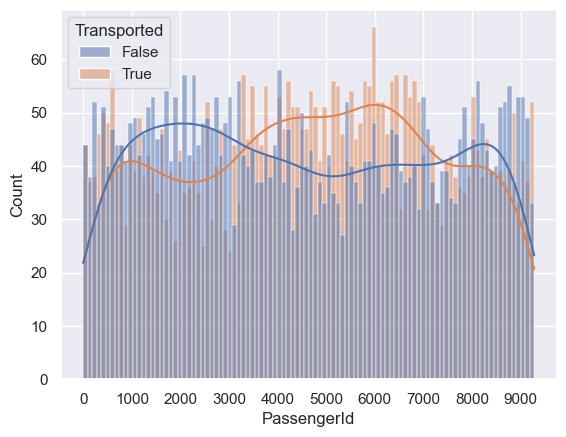

In [135]:
# histogram for group variable
sns.histplot(x=group, hue=train_data.Transported, bins=100, kde=True)
plt.xticks([i*1000 for i in range(10)])
plt.show()

note:
- certain group range has high transportation rate as compared to another

action:
- seperate groups into bins of range 0, 3500, 7500, 9300
- these bins can be used as categorical feature instead of groups

<br>

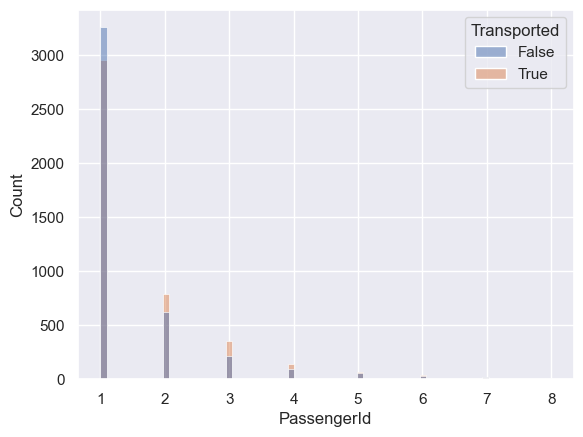

In [136]:
# histogram for num_in_group
sns.histplot(x=num_in_group, hue=train_data.Transported)
plt.show()

note:
- num_in_group can be treated as ordinal variable and hence can be kept same

<br>

#### Cabin

In [149]:
# seperating deck, num_in_cabin, side
deck = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else x.split("/")[0])
num_in_cabin = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else int(x.split("/")[1]))
side = train_data.Cabin.apply(lambda x: np.nan if pd.isna(x) else x.split("/")[2])

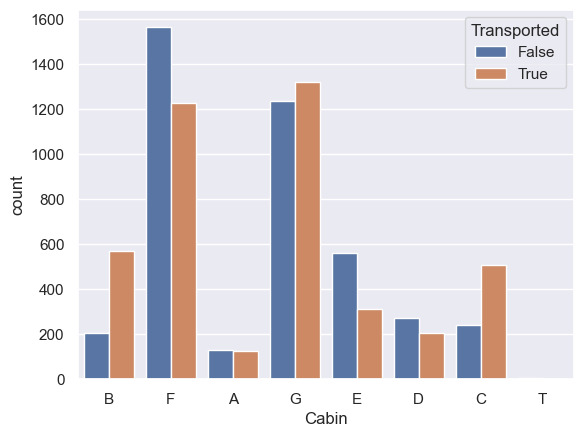

In [147]:
# deck countplot
sns.countplot(x=deck, hue=train_data.Transported)
plt.show()

note:
- deck B, G, C has high transported count
- deck F, E, D has low transported count
- deck A has same count

actions:
- deck T column can be removed after encoding (very little count)

<br>

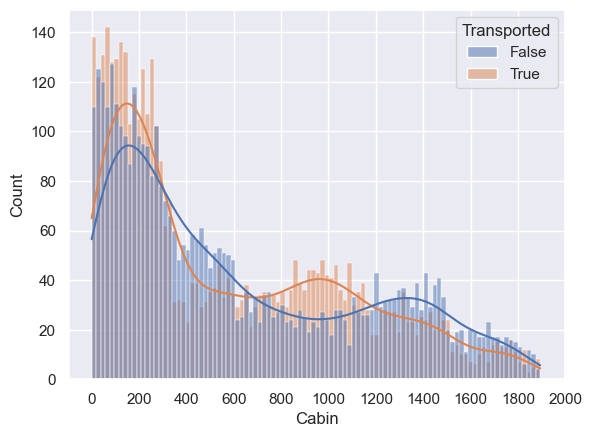

In [156]:
# num_in_cabin histogram
sns.histplot(x=num_in_cabin, hue=train_data.Transported, bins=100, kde=True)
plt.xticks([i*200 for i in range(11)])
plt.show()

note:
- same as groups, certain cabins has high transportation rate as compared to another

action:
- seperate cabins into bins of range 0, 300, 700, 1200, 1900
- these bins can be used as categorical feature instead of num_in_cabin

<br>

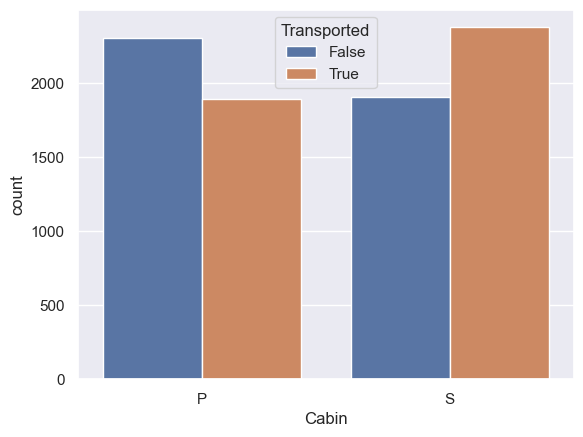

In [158]:
# side countplot
sns.countplot(x=side, hue=train_data.Transported)
plt.show()

note:
- side S has more transported rate as compared to side P

<br>

#### Name

In [162]:
# seperating first and last name
first_name = train_data.Name.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[0])
last_name = train_data.Name.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[1])

We know that most of the time, if the first name ends with a, e, i, y then it is a lady.<br>
We can try out this assumption and see that if there is difference in transportation rate for men and women.<br>
<br>
Currently we are using this simple technique to guess the gender of passenger. A more powerful algorithm can also be used from **nltk** package.

In [181]:
# creating gender feature
is_male = first_name.apply(lambda x: np.nan if pd.isna(x) else (0 if x[-1] in ["a", "e", "i", "y"] else 1))

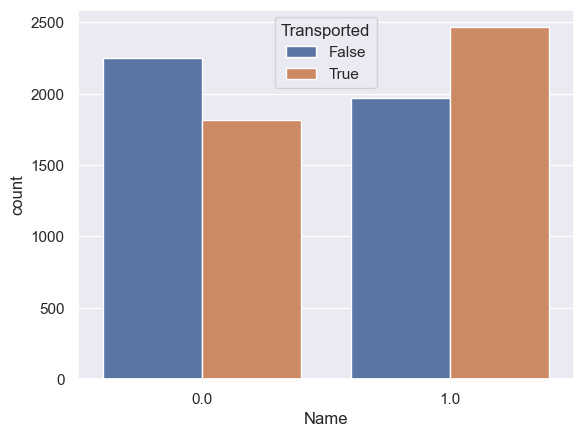

In [182]:
# gender countplot
sns.countplot(x=is_male, hue=train_data.Transported)
plt.show()

note:
- men have higher chance of getting transported than women

action:
- add gender feature to the dataset

<br>
<br>
<br>

### Next steps

During data inspection we saw all the columns have missing value except for, `PassengerId` and `Transported`.<br>
So, how we deal with missing values will have great impact on performance of the model. <br>
<br>
Next notebook: **Handling Missing Values**